# CNN on MNSIT DATASET USING KERAS FUNCTIONAL API

## Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline


In [13]:
from keras.models import InputLayer
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Input
from keras.optimizers import Adam
from keras.models import Model

In [3]:
tf.__version__

'1.3.0'

## Load Data

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [5]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [6]:
data.test.cls = np.argmax(data.test.labels, axis=1)

## Data Dimensions

In [7]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [8]:
def plot_images(images, class_true, class_pred=None):
    assert len(images) == len(class_true) == 9
    
    # Create figure with 3x3 sub-plots.
    f, ax = plt.subplots(3, 3)
    f.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(ax.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if class_pred is None:
            xlabel = "True: {0}".format(class_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(class_true[i], class_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

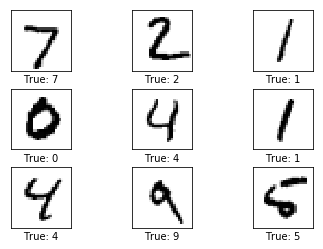

In [9]:
images = data.test.images[0:9]

# Get the true classes for those images.
class_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, class_true=class_true)

In [10]:
def plot_example_errors(class_pred):
    # class_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (class_pred != data.test.cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[incorrect]

    # Get the true classes for those images.
    class_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])
def plot_example_classified(class_pred):
    # class_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    correct = (class_pred == data.test.cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[correct]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[correct]

    # Get the true classes for those images.
    class_true = data.test.cls[correct]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])

## Functional Model

In [15]:
# Create an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
inputs = Input(shape=(img_size_flat,))

# Variable used for building the Neural Network.
net = inputs

# The input is an image as a flattened array with 784 elements.
# But the convolutional layers expect images with shape (28, 28, 1)
net = Reshape(img_shape_full)(net)

# First convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
             activation='relu', name='layer_conv1')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Second convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
             activation='relu', name='layer_conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Flatten the output of the conv-layer from 4-dim to 2-dim.
net = Flatten()(net)

# First fully-connected / dense layer with ReLU-activation.
net = Dense(128, activation='relu')(net)

# Last fully-connected / dense layer with softmax-activation
# so it can be used for classification.
net = Dense(num_classes, activation='softmax')(net)

# Output of the Neural Network.
outputs = net

In [16]:
model = Model(inputs=inputs, outputs=outputs)

In [17]:
adam = Adam(lr=1e-3)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
__________

## Training the model

In [20]:
model.fit(x=data.train.images,
           y=data.train.labels,
           epochs=10, batch_size=1024)

Epoch 1/10
55000/55000 [==============================] - 111s 2ms/step - loss: 0.5439 - acc: 0.8610
Epoch 2/10
55000/55000 [==============================] - 107s 2ms/step - loss: 0.1660 - acc: 0.9513
Epoch 3/10
55000/55000 [==============================] - 108s 2ms/step - loss: 0.1069 - acc: 0.9682
Epoch 4/10
55000/55000 [==============================] - 109s 2ms/step - loss: 0.0817 - acc: 0.9753
Epoch 5/10
55000/55000 [==============================] - 109s 2ms/step - loss: 0.0659 - acc: 0.9810
Epoch 6/10
55000/55000 [==============================] - 111s 2ms/step - loss: 0.0572 - acc: 0.9823
Epoch 7/10
55000/55000 [==============================] - 109s 2ms/step - loss: 0.0495 - acc: 0.9845
Epoch 8/10
55000/55000 [==============================] - 109s 2ms/step - loss: 0.0433 - acc: 0.9870
Epoch 9/10
55000/55000 [==============================] - 109s 2ms/step - loss: 0.0396 - acc: 0.9879
Epoch 10/10
55000/55000 [==============================] - 109s 2ms/step - loss: 0.0344 - a

## Evaluation

In [21]:
result = model.evaluate(x=data.test.images,
                         y=data.test.labels)

10000/10000 [==============================] - 11s 1ms/step


In [22]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.0342822528996
acc 0.9875


In [23]:
print("{0}: {1:.2%}".format(model.metrics_names[1], result[1]))

acc: 98.75%


## Examples of mis-classified Images

In [24]:
y_pred = model.predict(x=data.test.images)

In [25]:
class_pred = np.argmax(y_pred, axis=1)

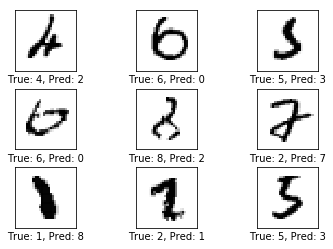

In [26]:
plot_example_errors(class_pred)

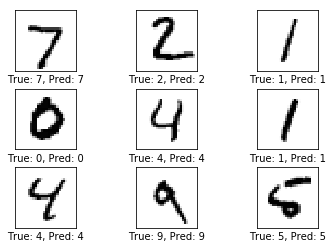

In [27]:
plot_example_classified(class_pred)

## Save & Load Model

In [28]:
path_model = 'Functional-model.keras'
model.save(path_model)

In [29]:
# Delete the model from memory so we are sure it is no longer used.
del model

In [30]:
# loading the model
from keras.models import load_model
model = load_model(path_model)

In [31]:
images = data.test.images[0:9]

In [32]:
cls_true = data.test.cls[0:9]

In [33]:
y_pred = model.predict(x=images)

In [34]:
class_pred = np.argmax(y_pred, axis=1)

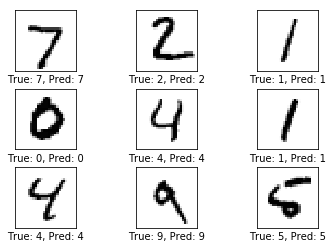

In [35]:
plot_images(images=images,
            class_pred=class_pred,
            class_true=class_true)